In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as sklm
from sklearn import preprocessing
import seaborn as sns
import sklearn.model_selection as ms
from pandas_ml import ConfusionMatrix

In [41]:
#Reading the excel file into jupyter notebook 
df1 = pd.read_excel('data.xlsx')

In [42]:
#Looking at the first 20 rows of the dataset 
df1.head(10)

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal,Mitoses,"Class- 2 for benign, 4 for malignant"
0,1000025,5,1.0,1.0,1.0,2.0,1,3.0,1.0,1,2
1,1002945,5,4.0,4.0,5.0,7.0,10,3.0,2.0,1,2
2,1015425,3,1.0,1.0,1.0,2.0,2,3.0,1.0,1,2
3,1016277,6,8.0,8.0,1.0,3.0,4,3.0,7.0,1,2
4,1017023,4,1.0,1.0,3.0,2.0,1,3.0,1.0,1,2
5,1017122,8,10.0,10.0,8.0,7.0,10,9.0,7.0,1,4
6,1018099,1,1.0,1.0,1.0,2.0,10,3.0,1.0,1,2
7,1018561,2,1.0,2.0,1.0,2.0,1,3.0,1.0,1,2
8,1033078,2,1.0,1.0,1.0,2.0,1,1.0,1.0,5,2
9,1033078,4,2.0,1.0,1.0,2.0,1,2.0,1.0,1,2


In [43]:
#Looking at the number of columns and rows
df1.shape

(735, 11)

In [44]:
#looking at the missing values in each column
df1.isnull().sum()

Id                                      30
 Clump Thickness                        32
Uniformity of Cell Size                 33
Uniformity of Cell Shape                33
Marginal                                33
Single Epithelial Cell Size             33
Bare Nuclei                             33
Bland Chromatin                         33
Normal                                  33
Mitoses                                 32
Class- 2 for benign, 4 for malignant    31
dtype: int64

In [45]:
#Removing the missing values 
df1=df1.dropna()

In [46]:
df1.isnull().sum()

Id                                      0
 Clump Thickness                        0
Uniformity of Cell Size                 0
Uniformity of Cell Shape                0
Marginal                                0
Single Epithelial Cell Size             0
Bare Nuclei                             0
Bland Chromatin                         0
Normal                                  0
Mitoses                                 0
Class- 2 for benign, 4 for malignant    0
dtype: int64

In [47]:
#checking at the datatype of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 734
Data columns (total 11 columns):
Id                                      702 non-null object
 Clump Thickness                        702 non-null object
Uniformity of Cell Size                 702 non-null float64
Uniformity of Cell Shape                702 non-null float64
Marginal                                702 non-null float64
Single Epithelial Cell Size             702 non-null float64
Bare Nuclei                             702 non-null object
Bland Chromatin                         702 non-null float64
Normal                                  702 non-null float64
Mitoses                                 702 non-null object
Class- 2 for benign, 4 for malignant    702 non-null object
dtypes: float64(6), object(5)
memory usage: 65.8+ KB


In [48]:
df1.shape

(702, 11)

In [49]:
df1['Id'].value_counts()

1182404    6
1276091    5
1198641    3
1158247    2
1061990    2
1277792    2
1214556    2
695091     2
1354840    2
1100524    2
822829     2
734111     2
1174057    2
560680     2
654546     2
1180194    2
1218860    2
1173347    2
1240603    2
769612     2
411453     2
1293439    2
897471     2
1017023    2
704097     2
1320077    2
1299596    2
1033078    2
1115293    2
1070935    2
          ..
1293966    1
1214092    1
1223306    1
1224329    1
1313325    1
1200772    1
1208301    1
1015425    1
183936     1
733823     1
1181567    1
255644     1
1319609    1
543558     1
1172152    1
1121919    1
1296025    1
1207986    1
1302428    1
857774     1
1181356    1
1125035    1
1201834    1
432809     1
452264     1
709287     1
1031608    1
1204898    1
1330439    1
527363     1
Name: Id, Length: 645, dtype: int64

In [50]:
len(df1['Id'].value_counts())

645

In [51]:
df1 = df1.drop(['Id'], axis = 1)

In [52]:
df1.rename(columns={' Clump Thickness': 'Clump_Thickness','Uniformity of Cell Size':'Uniformity_of_Cell_Size','Uniformity of Cell Shape':'Uniformity_of_Cell_Shape'
                   ,'Single Epithelial Cell Size':'Single_Epithelial_Cell_Size'
                   ,'Bare Nuclei':'Bare_Nuclei','Bland Chromatin':'Bland_Chromatin','Class- 2 for benign, 4 for malignant':'target'}, inplace=True)

In [53]:
df1['Mitoses'].value_counts()

1     581
2      35
3      34
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [54]:
#combining classes in the categorial variable
mapping = {7:'Mitoses_other',8:'Mitoses_other',5:'Mitoses_other',6:'Mitoses_other',4:'Mitoses_other',10:'Mitoses_other',1:'Mitoses_1',2:'Mitoses_2',3:'Mitoses_3'}
df1['Mitoses']=df1['Mitoses'].replace(mapping)

In [55]:
df1['Clump_Thickness'].value_counts()

1     145
5     131
3     110
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_Thickness, dtype: int64

In [56]:
mappin = {10:'Clump_Thickness_other',2:'Clump_Thickness_other',8:'Clump_Thickness_other',6:'Clump_Thickness_other',7:'Clump_Thickness_other',9:'Clump_Thickness_other',1:'Clump_Thickness_1',5:'Clump_Thickness_5',3:'Clump_Thickness_3',4:'Clump_Thickness_4'}
df1['Clump_Thickness']=df1['Clump_Thickness'].replace(mappin)

In [57]:
df1['Bare_Nuclei'].value_counts()

1     404
10    133
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [58]:
mappi = {5:'Bare_Nuclei_other',2:'Bare_Nuclei_other',3:'Bare_Nuclei_other',8:'Bare_Nuclei_other',4:'Bare_Nuclei_other','?':'Bare_Nuclei_other',9:'Bare_Nuclei_other',7:'Bare_Nuclei_other',6:'Bare_Nuclei_other',1:'Bare_Nuclei_1',10:'Bare_Nuclei_10'}
df1['Bare_Nuclei']=df1['Bare_Nuclei'].replace(mappi)

In [59]:
df1['target'].value_counts()

2    460
4    242
Name: target, dtype: int64

In [60]:
#Creating dummy varibales for Mitoses variable
dummy1 = pd.get_dummies(df1['Mitoses'])
dummy1.head()

,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_other
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [61]:
#Joining the above created dummy variables to original dataframe
df1 = pd.concat([df1,dummy1],axis=1)
df1.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal,Mitoses,target,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_other
0,Clump_Thickness_5,1.0,1.0,1.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,1,0,0,0
1,Clump_Thickness_5,4.0,4.0,5.0,7.0,Bare_Nuclei_10,3.0,2.0,Mitoses_1,2,1,0,0,0
2,Clump_Thickness_3,1.0,1.0,1.0,2.0,Bare_Nuclei_other,3.0,1.0,Mitoses_1,2,1,0,0,0
3,Clump_Thickness_other,8.0,8.0,1.0,3.0,Bare_Nuclei_other,3.0,7.0,Mitoses_1,2,1,0,0,0
4,Clump_Thickness_4,1.0,1.0,3.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,1,0,0,0


In [62]:
#Creating dummy varibales for Clump_Thickness variable
dummy2 = pd.get_dummies(df1['Clump_Thickness'])
dummy2.head()

,Clump_Thickness_1,Clump_Thickness_3,Clump_Thickness_4,Clump_Thickness_5,Clump_Thickness_other
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [63]:
#Joining the above created dummy variables to original dataframe
df1 = pd.concat([df1,dummy2],axis=1)
df1.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal,Mitoses,target,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_other,Clump_Thickness_1,Clump_Thickness_3,Clump_Thickness_4,Clump_Thickness_5,Clump_Thickness_other
0,Clump_Thickness_5,1.0,1.0,1.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,1,0,0,0,0,0,0,1,0
1,Clump_Thickness_5,4.0,4.0,5.0,7.0,Bare_Nuclei_10,3.0,2.0,Mitoses_1,2,1,0,0,0,0,0,0,1,0
2,Clump_Thickness_3,1.0,1.0,1.0,2.0,Bare_Nuclei_other,3.0,1.0,Mitoses_1,2,1,0,0,0,0,1,0,0,0
3,Clump_Thickness_other,8.0,8.0,1.0,3.0,Bare_Nuclei_other,3.0,7.0,Mitoses_1,2,1,0,0,0,0,0,0,0,1
4,Clump_Thickness_4,1.0,1.0,3.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,1,0,0,0,0,0,1,0,0


In [64]:
#Creating dummy varibales for Bare_Nuclei variable
dummy3 = pd.get_dummies(df1['Bare_Nuclei'])
dummy3.head()

,Bare_Nuclei_1,Bare_Nuclei_10,Bare_Nuclei_other
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0


In [65]:
#Joining the above created dummy variables to original dataframe
df1 = pd.concat([df1,dummy3],axis=1)
df1.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal,Mitoses,target,...,Mitoses_3,Mitoses_other,Clump_Thickness_1,Clump_Thickness_3,Clump_Thickness_4,Clump_Thickness_5,Clump_Thickness_other,Bare_Nuclei_1,Bare_Nuclei_10,Bare_Nuclei_other
0,Clump_Thickness_5,1.0,1.0,1.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,...,0,0,0,0,0,1,0,1,0,0
1,Clump_Thickness_5,4.0,4.0,5.0,7.0,Bare_Nuclei_10,3.0,2.0,Mitoses_1,2,...,0,0,0,0,0,1,0,0,1,0
2,Clump_Thickness_3,1.0,1.0,1.0,2.0,Bare_Nuclei_other,3.0,1.0,Mitoses_1,2,...,0,0,0,1,0,0,0,0,0,1
3,Clump_Thickness_other,8.0,8.0,1.0,3.0,Bare_Nuclei_other,3.0,7.0,Mitoses_1,2,...,0,0,0,0,0,0,1,0,0,1
4,Clump_Thickness_4,1.0,1.0,3.0,2.0,Bare_Nuclei_1,3.0,1.0,Mitoses_1,2,...,0,0,0,0,1,0,0,1,0,0


In [66]:
df1 = df1.drop(['Mitoses','Clump_Thickness','Bare_Nuclei'], axis = 1)

In [67]:
#descriptive stats of the dataframe
df1.describe()

,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_other,Clump_Thickness_1,Clump_Thickness_3,Clump_Thickness_4,Clump_Thickness_5,Clump_Thickness_other,Bare_Nuclei_1,Bare_Nuclei_10,Bare_Nuclei_other
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,3.138177,3.207977,2.811966,3.219373,3.433048,2.866097,0.827635,0.049858,0.048433,0.074074,0.206553,0.156695,0.113960,0.186610,0.336182,0.575499,0.189459,0.235043
std,3.058068,2.973405,2.863808,2.217881,2.434404,3.051020,0.377966,0.217806,0.214833,0.262078,0.405120,0.363772,0.317989,0.389876,0.472739,0.494620,0.392152,0.424328
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,5.000000,4.000000,4.000000,4.750000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#display a correlation matrix for all of the numeric features
df1.corr()

,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_other,Clump_Thickness_1,Clump_Thickness_3,Clump_Thickness_4,Clump_Thickness_5,Clump_Thickness_other,Bare_Nuclei_1,Bare_Nuclei_10,Bare_Nuclei_other
Uniformity_of_Cell_Size,1.000000,0.907238,0.708279,0.753756,0.752685,0.723339,-0.497725,0.130997,0.269906,0.387696,-0.327057,-0.196455,-0.115970,0.019023,0.493767,-0.654354,0.534846,0.268461
Uniformity_of_Cell_Shape,0.907238,1.000000,0.684925,0.721193,0.734460,0.720279,-0.468173,0.122737,0.252193,0.366462,-0.318749,-0.209537,-0.136750,0.046460,0.488064,-0.655719,0.553398,0.252907
Marginal,0.708279,0.684925,1.000000,0.603028,0.663407,0.604297,-0.456987,0.106532,0.230459,0.381613,-0.270180,-0.148321,-0.101754,0.077467,0.350224,-0.567024,0.589399,0.116248
Single_Epithelial_Cell_Size,0.753756,0.721193,0.603028,1.000000,0.613844,0.629831,-0.461944,0.060012,0.271076,0.394129,-0.275951,-0.150523,-0.132588,0.066422,0.386713,-0.533974,0.454038,0.202819
Bland_Chromatin,0.752685,0.734460,0.663407,0.613844,1.000000,0.665443,-0.390076,0.126028,0.197145,0.296220,-0.290437,-0.163721,-0.065684,-0.023641,0.438557,-0.620739,0.550503,0.214807
Normal,0.723339,0.720279,0.604297,0.629831,0.665443,1.000000,-0.492592,0.201115,0.218842,0.363879,-0.276510,-0.176435,-0.115111,0.025833,0.428851,-0.576536,0.424228,0.279982
Mitoses_1,-0.497725,-0.468173,-0.456987,-0.461944,-0.390076,-0.492592,1.000000,-0.501957,-0.494364,-0.619784,0.195577,0.134465,0.128057,0.024974,-0.377807,0.432160,-0.385703,-0.147293
Mitoses_2,0.130997,0.122737,0.106532,0.060012,0.126028,0.201115,-0.501957,1.000000,-0.051680,-0.064791,-0.084543,-0.080738,-0.061556,-0.008926,0.183345,-0.213752,0.173178,0.089115
Mitoses_3,0.269906,0.252193,0.230459,0.271076,0.197145,0.218842,-0.494364,-0.051680,1.000000,-0.063811,-0.115109,-0.060742,-0.060028,0.028192,0.162512,-0.208985,0.212648,0.047080
Mitoses_other,0.387696,0.366462,0.381613,0.394129,0.296220,0.363879,-0.619784,-0.064791,-0.063811,1.000000,-0.117440,-0.077032,-0.084319,-0.051708,0.259280,-0.274303,0.238020,0.099771


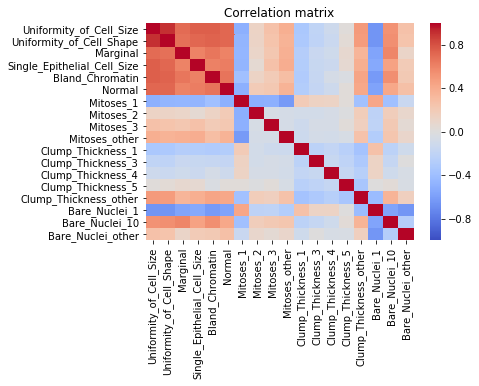

In [69]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, vmax=1.0, vmin=-1.0, cmap='coolwarm') 
plt.title('Correlation matrix')
plt.xticks(rotation='90')
plt.show()


In [70]:
df1 = df1.drop(['Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape'], axis = 1)

In [71]:
#Training and Testing Data
#compute the size of the testing data set
test_size = int(df1.shape[0] * 0.4) #30% of the data will be used for testing

indexes = ms.train_test_split(range(df1.shape[0]), test_size = test_size, random_state = 42)

#define the training data set
training = df1.iloc[indexes[0],:]

#define the testing data set
testing = df1.iloc[indexes[1],:]

In [72]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 299 to 106
Data columns (total 17 columns):
Marginal                       422 non-null float64
Single_Epithelial_Cell_Size    422 non-null float64
Bland_Chromatin                422 non-null float64
Normal                         422 non-null float64
target                         422 non-null object
Mitoses_1                      422 non-null uint8
Mitoses_2                      422 non-null uint8
Mitoses_3                      422 non-null uint8
Mitoses_other                  422 non-null uint8
Clump_Thickness_1              422 non-null uint8
Clump_Thickness_3              422 non-null uint8
Clump_Thickness_4              422 non-null uint8
Clump_Thickness_5              422 non-null uint8
Clump_Thickness_other          422 non-null uint8
Bare_Nuclei_1                  422 non-null uint8
Bare_Nuclei_10                 422 non-null uint8
Bare_Nuclei_other              422 non-null uint8
dtypes: float64(4), object(1), uin

In [73]:
#converting the object data type of both the data sets to int.
col1 = ['target']
training[col1] = training[col1].astype(int)
testing[col1] = testing[col1].astype(int)
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 299 to 106
Data columns (total 17 columns):
Marginal                       422 non-null float64
Single_Epithelial_Cell_Size    422 non-null float64
Bland_Chromatin                422 non-null float64
Normal                         422 non-null float64
target                         422 non-null int64
Mitoses_1                      422 non-null uint8
Mitoses_2                      422 non-null uint8
Mitoses_3                      422 non-null uint8
Mitoses_other                  422 non-null uint8
Clump_Thickness_1              422 non-null uint8
Clump_Thickness_3              422 non-null uint8
Clump_Thickness_4              422 non-null uint8
Clump_Thickness_5              422 non-null uint8
Clump_Thickness_other          422 non-null uint8
Bare_Nuclei_1                  422 non-null uint8
Bare_Nuclei_10                 422 non-null uint8
Bare_Nuclei_other              422 non-null uint8
dtypes: float64(4), int64(1), uint8

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [74]:

from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
clf = svm.SVC(kernel='linear')

In [76]:
clf.fit(training[['Marginal','Single_Epithelial_Cell_Size',
                      'Bland_Chromatin','Normal','Mitoses_1','Mitoses_2','Mitoses_3','Mitoses_other','Clump_Thickness_1','Clump_Thickness_3','Clump_Thickness_4','Clump_Thickness_5','Clump_Thickness_other','Bare_Nuclei_10','Bare_Nuclei_1','Bare_Nuclei_other']], training['target'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
predictions = clf.predict(testing[['Marginal','Single_Epithelial_Cell_Size',
                      'Bland_Chromatin','Normal','Mitoses_1','Mitoses_2','Mitoses_3','Mitoses_other','Clump_Thickness_1','Clump_Thickness_3','Clump_Thickness_4','Clump_Thickness_5','Clump_Thickness_other','Bare_Nuclei_10','Bare_Nuclei_1','Bare_Nuclei_other']])

#predictions = clf.predict(testing[['Marginal','Single_Epithelial_Cell_Size',
                      #'Bland_Chromatin','Normal','1M','2M','3M','other','1C','3C','4C','5C','other1','10B','1B','other2']])

In [78]:
#Calculating the model accuracy 
def print_metrics(actual, predicted):
    metrics = sklm.precision_recall_fscore_support(actual, predicted)
    conf = sklm.confusion_matrix(actual, predicted)
    print('                 CONFUSION MATRIX')
    print('                 Predicted positive    Predicted negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(actual, predicted))
    print(' ')
    print('           Positive      Negative')
    print('Cases      %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
   
    print(np.count_nonzero(predictions == 2 ))
    print(np.count_nonzero(predictions == 4))
    print(np.count_nonzero(actual == 2 ))
    print(np.count_nonzero(actual == 4))
              

#show the performance of the model on the testing data
print_metrics(testing['target'], predictions)

                 CONFUSION MATRIX
                 Predicted positive    Predicted negative
Actual positive       177                 2
Actual negative        12                89

Accuracy  0.95
 
           Positive      Negative
Cases         179           101
Precision    0.94          0.98
Recall       0.99          0.88
F1           0.96          0.93
189
91
179
101
